<a href="https://colab.research.google.com/github/Jefferson-Luis/Projeto_serie_temporal/blob/main/Previsao_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Projeto de Série Temporal: Previsão de Vendas
##Contexto Fictício
###Usando os conceitos e tecnologias de Ciência de Dados

Você pode usar o método SARIMAX (Seasonal AutoRegressive Integrated Moving Average com Explanatory Variables) do pacote Statsmodels para fazer previsões de séries temporais. Aqui está um exemplo de código em Python para fazer uma previsão para os próximos 5 dias:

In [55]:
# Importando bibliotecas
import pandas as pd
from datetime import timedelta
import statsmodels.api as sm
import matplotlib.pyplot as plt


#1.Coletar dados

In [35]:
import pandas as pd
df = pd.read_excel('/content/Dados.xlsx')


#2. Preparar os dados

In [36]:
# alterando o index para data
df = df.set_index('Data')

# ver o resultado da transformação
df.head()

,Vendas
Data,
2022-12-06,870
2022-12-07,868
2022-12-08,1189
2022-12-09,742
2022-12-10,317


In [56]:
# Valores ausentes
print("""Quantos valores faltantes existem em cada variável?
Variável | Valores ausentes""")
df.isnull().sum()

Quantos valores faltantes existem em cada variável?
Variável | Valores ausentes


Vendas    0
dtype: int64

In [57]:
# Valores duplicados
df.drop_duplicates(inplace = True)


In [58]:
# Forma do conjunto de dados
print("Numero de linhas:", df.shape[0])
print("Numero de colunas: ", df.shape[1])

Numero de linhas: 44
Numero de colunas:  1


Estatísticas das vendas :

* Média: 763,90
* Desvio padrão: 435,36
* Valor minimo: 18
* Maior venda: 1692.

In [59]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Vendas,44.0,763.909091,435.365114,18.0,401.5,810.5,1065.5,1692.0


# 3.Cria o Modelo SARIMAX

In [38]:
# Criar o modelo 
model = sm.tsa.SARIMAX(df, order=(1,0,0), seasonal_order=(1,1,1,12))
model_fit = model.fit()

# Fazer a previsão para os próximos 5 dias
pred = model_fit.get_forecast(steps=5).predicted_mean

# Visualizar as previsões
print('---------------------------------------')
print()
print('Previsões para os próximos cinco dias ')
print(pred)
print()
print('---------------------------------------')



/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


---------------------------------------

Previsões para os próximos cinco dias 
2023-01-21    691.769816
2023-01-22    505.394252
2023-01-23    351.921998
2023-01-24    602.624334
2023-01-25    598.718809
Freq: D, Name: predicted_mean, dtype: float64

---------------------------------------


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


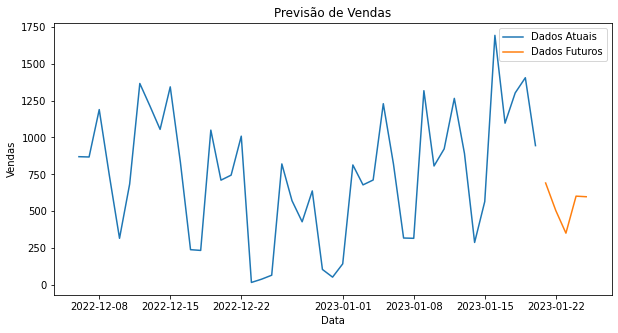

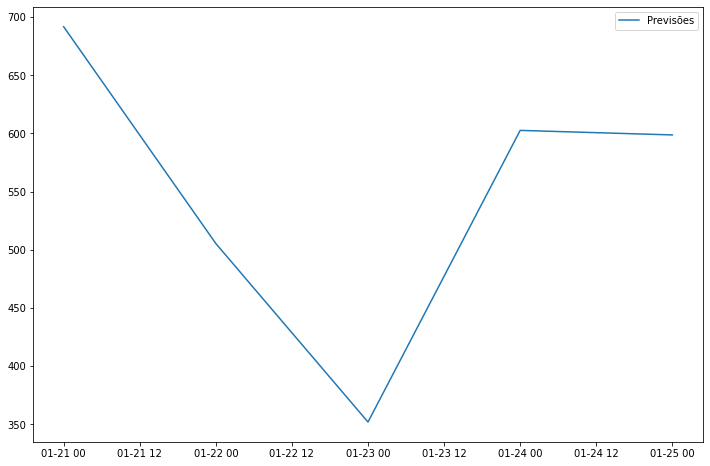

In [53]:
# Criar o gráfico dos dados atuais
plt.figure(figsize=(10, 5))
plt.plot(df.index, df["Vendas"], label="Dados Atuais")
plt.xlabel("Data")
plt.ylabel("Vendas")
plt.title("Dados Atuais")

# Criar o gráfico dos dados Futuros
plt.plot(pred, label="Dados Futuros")
plt.xlabel("Data")
plt.ylabel("Vendas")
plt.title("Previsão de Vendas")
plt.legend()
plt.show()

# Plotar os dados atuais
#plt.plot(df.index, df['Data'], label='Dados Atuais')

# Plotar as previsões
plt.figure(figsize=(12,8))
plt.plot(pred.index, pred.values, label='Previsões')

# Adicionar legenda
plt.legend()

# Exibir o gráfico

plt.show()




